<h2>Twitter Movie Success Predictor</h2>

Thomas Le

In [16]:
import pandas as pd
import numpy as np
import csv

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor

import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
#import data
bo_data = pd.read_csv('box_office_data.csv')
tm_data = pd.read_csv('twitter_movie_data.csv')

In [18]:
#clean floats on total tweets, total likes, and retweets
#round average tweet sentiment values to 3 values
#capitalize column titles
as_int = tm_data[['total number of tweets','total likes','retweets']].astype(int)
avgsent = tm_data[['average tweet sentiment']].round(3)

tm_data[['total number of tweets', 'total likes','retweets']] = as_int
tm_data['average tweet sentiment'] = avgsent
tm_data[['movie title','Tweets','Likes','Retweets','Avg Sentiment']] = tm_data
tm_data = tm_data.drop(columns=['total number of tweets', 'total likes','retweets','average tweet sentiment'])

ValueError: Cannot set a frame with no defined index and a value that cannot be converted to a Series

In [19]:
bigboi = pd.concat([bo_data, tm_data], axis=1)
bigboi = bigboi.drop(columns=['movie title'])
display(bigboi.head())

,Movie Title,Opening Weekend Revenue,Theaters Released In,Revenue Per Theater,Date Released,Unnamed: 0,total number of tweets,total likes,retweets,average tweet sentiment
0,Jurassic World,208806270,4274,48855,6/12/15,NaN,NaN,NaN,NaN,NaN
1,Inside Out,90440272,3946,22919,6/19/15,NaN,NaN,NaN,NaN,NaN
2,Furious 7,147187040,4004,36760,4/3/15,NaN,NaN,NaN,NaN,NaN
3,Minions,115718405,4301,26905,7/10/15,NaN,NaN,NaN,NaN,NaN
4,The Martian,54308575,3831,14176,10/2/15,NaN,NaN,NaN,NaN,NaN


In [20]:
#using this to screenshot for display on website

cols = ['Movie Title','Tweets','Likes','Retweets','Avg Sentiment','Opening Weekend Revenue','Date Released']
bigboi_for_display = bigboi[cols]
#display(bigboi_for_display.head(16))

KeyError: "['Retweets', 'Tweets', 'Avg Sentiment', 'Likes'] not in index"

<h2>General Trends in Data</h2>

In [21]:
bigboi.describe()

,Opening Weekend Revenue,Theaters Released In,Revenue Per Theater,total number of tweets,total likes,retweets
count,2.460000e+02,246.000000,246.000000,0.0,0.0,0.0
mean,3.256039e+07,3326.577236,9033.065041,NaN,NaN,NaN
std,3.417903e+07,554.915570,7966.681791,NaN,NaN,NaN
min,4.954287e+06,2012.000000,1856.000000,NaN,NaN,NaN
25%,1.312060e+07,2940.250000,4405.500000,NaN,NaN,NaN
50%,1.906019e+07,3303.500000,6052.500000,NaN,NaN,NaN
75%,3.594700e+07,3765.250000,10685.000000,NaN,NaN,NaN
max,2.088063e+08,4529.000000,50249.000000,NaN,NaN,NaN


KeyError: 'Tweets'

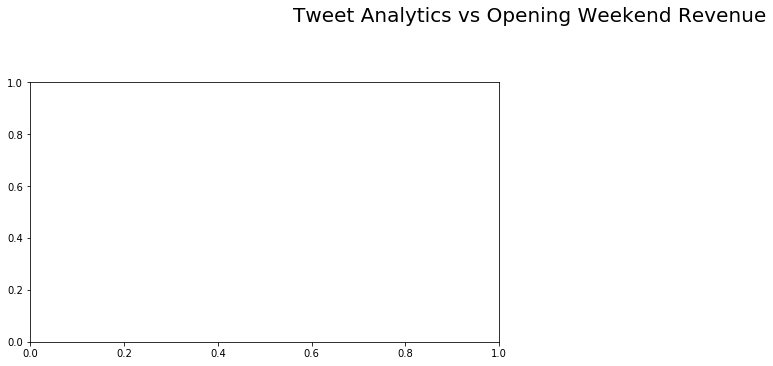

In [22]:
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
fig.suptitle('Tweet Analytics vs Opening Weekend Revenue', fontsize=20)

plt.subplot(2, 2, 1)
plt.scatter(bigboi['Tweets'], bigboi['Opening Weekend Revenue'])
plt.gca().set_title('Tweets vs Revenue', fontsize=12)
plt.xlabel('Tweets', fontsize=10)
plt.ylabel('Opening Weekend Revenue (100 million)', fontsize=10)

plt.subplot(2, 2, 2)
plt.scatter(bigboi['Likes'], bigboi['Opening Weekend Revenue'])
plt.gca().set_title('Likes vs Revenue', fontsize=12)
plt.xlabel('Likes', fontsize=10)
plt.ylabel('Opening Weekend Revenue (100 million)', fontsize=10)

plt.subplot(2, 2, 3)
plt.scatter(bigboi['Retweets'], bigboi['Opening Weekend Revenue'])
plt.gca().set_title('Retweets vs Revenue', fontsize=12)
plt.xlabel('Retweets', fontsize=10)
plt.ylabel('Opening Weekend Revenue (100 million)', fontsize=10)

plt.subplot(2, 2, 4)
plt.scatter(bigboi['Avg Sentiment'], bigboi['Opening Weekend Revenue'])
plt.gca().set_title('Avg Sentiment vs Revenue', fontsize=12)
plt.xlabel('Avg Sentiment', fontsize=10)
plt.ylabel('Opening Weekend Revenue (100 million)', fontsize=10)

fig.savefig('tweet analytics vs revenue.jpg')
plt.show()

<h2>Testing Different Models</h2>

In [23]:
y = bigboi['Opening Weekend Revenue']      
features = ['Tweets', 'Likes', 'Retweets', 'Avg Sentiment']
X = bigboi[features]

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

KeyError: "None of [Index(['Tweets', 'Likes', 'Retweets', 'Avg Sentiment'], dtype='object')] are in the [columns]"

In [24]:
def regression_stats(model_name, pred_name, MAE, MSE, RMSE, pred_name2):
    model_name.fit(train_X, train_y)
    pred_name = model_name.predict(val_X)

    # The coefficients
    print('Intercept:', model_name.intercept_) #intercept
    print('Coefficients:', model_name.coef_) #slope
    coeff_df = pd.DataFrame(model_name.coef_, X.columns, columns=['Coefficient'])  
    display(coeff_df)
    print("largest coefficients (by magnitude, disregard positive or negative) means that that coefficient is oging to have a greater affect on the final revenue")
    print('')

    MAE = metrics.mean_absolute_error(val_y, pred_name)
    MSE = metrics.mean_squared_error(val_y, pred_name)
    RMSE = np.sqrt(metrics.mean_squared_error(val_y, pred_name))

    print('Mean Absolute Error:', f'{MAE:,}')  
    print('Mean Squared Error:', f'{MSE:,}')  
    print('Root Mean Squared Error:', f'{RMSE:,}')

    print('')
    #f'{value:,}' to go from regular to thousands format ex: 12400 to 12,400

    val_y2 = []
    for i in val_y:
        val_y2.append(f'{i:,}')

    pred_name2 = []
    for i in pred_name:
        pred_name2.append(f'{int(i):,}')

    df = pd.DataFrame({'Actual': val_y2, 'Predicted': pred_name2})
    df1 = df.head(25)
    #display(df1)
    return MAE


<b>Linear Regression</b>

In [25]:
linreg_model = linear_model.LinearRegression()
linreg_model.fit(train_X, train_y)
linreg_pred = linreg_model.predict(val_X)

coeff_df = pd.DataFrame(linreg_model.coef_, X.columns, columns=['Coefficient'])  
display(coeff_df)

linreg_MAE = metrics.mean_absolute_error(val_y, linreg_pred)
linreg_MSE = metrics.mean_squared_error(val_y, linreg_pred)
linreg_RMSE = np.sqrt(metrics.mean_squared_error(val_y, linreg_pred))

print('')
print('Mean Absolute Error:', f'{linreg_MAE:,}')  
print('Mean Squared Error:', f'{linreg_MSE:,}')  
print('Root Mean Squared Error:', f'{linreg_RMSE:,}')

NameError: name 'train_X' is not defined

<b>Ridge Regression</b>

In [26]:
ridge_model = linear_model.Ridge(alpha=.5)
ridge_model.fit(train_X, train_y)
ridge_pred = ridge_model.predict(val_X)

coeff_df = pd.DataFrame(ridge_model.coef_, X.columns, columns=['Coefficient'])  
display(coeff_df)

ridge_MAE = metrics.mean_absolute_error(val_y, ridge_pred)
ridge_MSE = metrics.mean_squared_error(val_y, ridge_pred)
ridge_RMSE = np.sqrt(metrics.mean_squared_error(val_y, ridge_pred))

print('')
print('Mean Absolute Error:', f'{ridge_MAE:,}')  
print('Mean Squared Error:', f'{ridge_MSE:,}')  
print('Root Mean Squared Error:', f'{ridge_RMSE:,}')

NameError: name 'train_X' is not defined

<b>Lasso Regression</b>

In [27]:
lasso_model = linear_model.Lasso(alpha=0.1)
lasso_model.fit(train_X, train_y)
lasso_pred = lasso_model.predict(val_X)

coeff_df = pd.DataFrame(lasso_model.coef_, X.columns, columns=['Coefficient'])  
display(coeff_df)

lasso_MAE = metrics.mean_absolute_error(val_y, lasso_pred)
lasso_MSE = metrics.mean_squared_error(val_y, lasso_pred)
lasso_RMSE = np.sqrt(metrics.mean_squared_error(val_y, lasso_pred))

print('')
print('Mean Absolute Error:', f'{lasso_MAE:,}')  
print('Mean Squared Error:', f'{lasso_MSE:,}')  
print('Root Mean Squared Error:', f'{lasso_RMSE:,}')

NameError: name 'train_X' is not defined

<b>Random Forest</b>

In [28]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train_X, train_y)
rf_pred = random_forest.predict(val_X)

rf_MAE = metrics.mean_absolute_error(val_y, rf_pred)
rf_MSE = metrics.mean_squared_error(val_y, rf_pred)
rf_RMSE = np.sqrt(metrics.mean_squared_error(val_y, rf_pred))

print('Mean Absolute Error:', f'{rf_MAE:,}')  
print('Mean Squared Error:', f'{rf_MSE:,}')  
print('Root Mean Squared Error:', f'{rf_RMSE:,}')

NameError: name 'train_X' is not defined

<b>XGBoost</b>

In [29]:
xgboost = XGBRegressor(n_estimators=15, learning_rate=0.1)
xgboost.fit(train_X, train_y)
xg_pred = xgboost.predict(val_X)

xg_MAE = metrics.mean_absolute_error(val_y, xg_pred)
xg_MSE = metrics.mean_squared_error(val_y, xg_pred)
xg_RMSE = np.sqrt(metrics.mean_squared_error(val_y, xg_pred))

print('')
print('Mean Absolute Error:', f'{xg_MAE:,}')  
print('Mean Squared Error:', f'{xg_MSE:,}')  
print('Root Mean Squared Error:', f'{xg_RMSE:,}')
print('')

NameError: name 'train_X' is not defined

<b>Best Model</b>

In [30]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Random Forest', 'XGBoost'],
    'MAE': [linreg_MAE, ridge_MAE, lasso_MAE, rf_MAE, xg_MAE] })
models.sort_values(by='MAE', ascending=True)

NameError: name 'linreg_MAE' is not defined

Best model is XGBoost, go forward using this model to predict which movies will make the most money.